<a href="https://colab.research.google.com/github/mohanashwin999/machine-learning-foundation-a-case-study-approach-colab-notebooks/blob/master/Analyzing_Product_Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download dataset using Wget (Paste the link as parameter)
#### All dataset links available in https://github.com/learnml/machine-learning-specialization/blob/master/README.md
###### 'ls' is used to check whether zip-file is downloaded which is next needed to be unzipped



In [0]:
!wget https://s3.amazonaws.com/static.dato.com/files/coursera/course-1/amazon_baby.gl.zip
!ls

--2020-04-22 18:58:03--  https://s3.amazonaws.com/static.dato.com/files/coursera/course-1/amazon_baby.gl.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.139.141
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.139.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42287723 (40M) [application/zip]
Saving to: ‘amazon_baby.gl.zip’

amazon_baby.gl.zip  100%[===================>]  40.33M  11.2MB/s    in 3.6s    

2020-04-22 18:58:07 (11.2 MB/s) - ‘amazon_baby.gl.zip’ saved [42287723/42287723]

amazon_baby.gl.zip  sample_data


## Unzip the zip file downloaded 

###### 'ls' is used to check that we get a ".gl" file which is to be passed to load_sframe() function


In [0]:
!unzip amazon_baby.gl.zip
!ls

Archive:  amazon_baby.gl.zip
   creating: amazon_baby.gl/
  inflating: amazon_baby.gl/dir_archive.ini  
  inflating: amazon_baby.gl/m_bfaa91c17752f745.0000  
  inflating: amazon_baby.gl/m_bfaa91c17752f745.frame_idx  
  inflating: amazon_baby.gl/m_bfaa91c17752f745.sidx  
 extracting: amazon_baby.gl/objects.bin  
amazon_baby.gl	amazon_baby.gl.zip  sample_data


## Download and import turicreate



In [0]:
!pip install turicreate
import turicreate

     |████████████████████████████████| 91.8MB 107kB/s 
     |████████████████████████████████| 3.4MB 47.4MB/s 
     |████████████████████████████████| 86.3MB 59kB/s 
     |████████████████████████████████| 327kB 46.8MB/s 
     |████████████████████████████████| 3.8MB 44.4MB/s 
     |████████████████████████████████| 450kB 47.1MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=5b4f0ccd0cc1a9b882d407101c43e1f85712df4b94a8776a1d9bb3a3b5069f0e
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=780e5921703eecb9773a6dc960f4f06310d1fc347aab6263366b4c64581d9ea7
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


## Load Sframe from .gl file

In [0]:
products = turicreate.load_sframe("amazon_baby.gl")

In [0]:
products.head()

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


## Build a worth count vector for each review

In [0]:
products["word_count"] = turicreate.text_analytics.count_words(products["review"])

In [0]:
products.head()

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'handles': 1.0,'stripping': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ..."


In [0]:
products["name"].show()

Materializing SArray

## Explore Vulli Sophie

In [0]:
giraffe_reviews = products[products["name"] == "Vulli Sophie the Giraffe Teether" ]

In [0]:
len(giraffe_reviews)

785

In [0]:
giraffe_reviews["rating"].show()

Materializing SArray

## Build a Sentiment Classifier

In [0]:
products["rating"].show()

Materializing SArray

## Define what is positive and what is negative sentiment

In [0]:
#ignore all 3 star reviews
products = products[products["rating"] != 3]

In [0]:
#positive statement = 4 or 5 star review
products["sentiment"] = products["rating"] >=4

In [0]:
products.head()

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",1


## Train the sentiment classifier

In [0]:
train_data, test_data = products.random_split(0.8, seed=0)

In [0]:
sentiment_model = turicreate.logistic_classifier.create(train_data,
                                                        target = "sentiment",
                                                        features=["word_count"],
                                                        validation_set = test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 2.295515     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 4.166890     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 5.105132     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 5.689751     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 6.594821     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 9.852413     | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

## Evaluate the sentiment model

In [0]:
results = sentiment_model.evaluate(test_data, metric = "roc_curve")
results

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0    |        1.0         |        1.0         | 27976 | 5328 |
 |   1e-05   | 0.847972972972973  | 0.9975693451529882 | 27976 | 5328 |
 |   2e-05   | 0.829954954954955  | 0.9971761509865599 | 27976 | 5328 |
 |   3e-05   | 0.818506006006006  | 0.9969616814412353 | 27976 | 5328 |
 |   4e-05   | 0.8109984984984985 | 0.9967472118959108 | 27976 | 5328 |
 |   5e-05   | 0.8057432432432432 | 0.9966042321990277 | 27976 | 5328 |
 |   6e-05   | 0.7991741741741741 | 0.9962825278810409 | 27976 | 5328 |
 |   7e-05   | 0.7952327327327328 | 0.9961752931083786 | 27976 | 5328 |
 |   8e-05   | 0.7920420420420421 | 0.9961038032599371 | 27976 | 5328 |
 |   9e-05   | 0.7882882882882

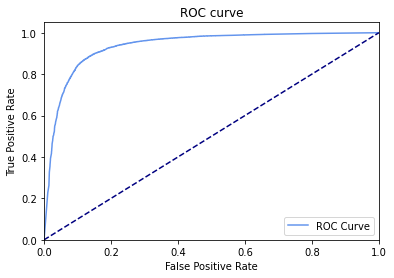

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results['roc_curve']['fpr'],
         results['roc_curve']['tpr'],
         color ='cornflowerblue',
         label='ROC Curve')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

## Applying the learned model too understand sentiment for Giraffe

In [0]:
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict(giraffe_reviews,output_type="probability")

In [0]:
giraffe_reviews.head()

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ...",0.9993655365682024
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ...",0.9998633791689578
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ...",0.2545268198204788
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ...",0.9165688083938948
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ...",0.68557682060184
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ...",0.99999994452112
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ...",0.9979351181094461
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ...",0.999974500483435
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ...",0.9460144428390704
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'off': 1.0, 'have': 2.0,'of': 1.0, 'some': 1.0, ...",0.38301136143089465


## Sort the review based on the predicted sentiment and explore

In [0]:
giraffe_reviews = giraffe_reviews.sort("predicted_sentiment",ascending=0)

In [0]:
giraffe_reviews.head()

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'around': 1.0,'explore': 1.0, 'they': ...",1.0
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'will': 1.0, '15months':1.0, 'would': 2.0, ...",1.0
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'11': 1.0, 'prisrob':1.0, '12': 1.0, 'who': ...",1.0
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'out': 1.0, 'would':1.0, 've': 1.0, 'enou ...",0.9999999999998377
Vulli Sophie the GiraffeTeether ...,"As every mom knows, youalways want to give your ...",5.0,"{'whether': 1.0,'neutral': 1.0, 'gend ...",0.9999999999998284
Vulli Sophie the GiraffeTeether ...,My Mom-in-Law boughtSophie for my son whe ...,5.0,"{'penny': 1.0, 'little':1.0, 'perfect': 1.0, ...",0.9999999999997958
Vulli Sophie the GiraffeTeether ...,"My 4 month old son isteething, and I've tried ...",4.0,"{'worth': 1.0, 'works':1.0, 'teether': 1.0, ...",0.9999999999994914
Vulli Sophie the GiraffeTeether ...,Let me just start off byaddressing the choking ...,5.0,"{'question': 1.0, 'must':1.0, 'overall': 1.0, ...",0.9999999999941254
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'makers': 1.0, 'or':1.0, 'take': 1.0, 'can': ...",0.999999999987423
Vulli Sophie the GiraffeTeether ...,"I admit, I didn't getSophie the Giraffe at ...",4.0,"{'dye': 1.0, 'of': 1.0,'cause': 1.0, 'fade': ...",0.9999999999829475


In [0]:
giraffe_reviews[0]["review"]

'I\'ll be honest...I bought this toy because all the hip parents seem to have one too and I wanted to be a part of the "hip parent" crowd. The price-tag was somewhat of a deterent but I prevailed and purchased this teether for my daughter.At first, Lily didn\'t know what to make of of Sophie and showed little interest in the polka-dotted creature. I continued to introduce Lily to Sophie and kept the toy in the carrier so that it was on-hand during transitions. Eventually, Lily discovered what a wonderful experience it was to gnaw on the hooves and ears and these two have never been far apart since.Lily really enjoys gumming all the different parts of Sophie like no other teether we have. The size of the toy is great as it is somewhat substantial and so easy for a little one to grasp and hold onto. Lily really enjoys hearing Sophie squeak and will smile whenever Sophie makes a noise or pops her head up from Mommy\'s lap to say hello.People have stopped and commented on Sophie and to the

In [0]:
giraffe_reviews[1]["review"]

"As a mother of 16month old twins; I bought Sophie [1 for each, of course] when they were 4 months old after careful reading of all reviews. I heard great things about Sophie and wanted to give her a try. At 4 months babies can't do much more than grasp and semi gnaw on Sophie. For many months I had to squeeze Sophie myself [which I personally enjoyed] and set it on their laps. They LOVED Sophie. The squeak is LOUD and sounds exactly like a dog's squeaky chew toy, just for those who are wondering.As they grew and their motor skills developed to each milestone, Sophie gained more and more individual babytime. The twins were able to squeeze her themselves and chew on her around the clock. They love to throw her, stretch her, squeeze her, chew on her, drool on her... you name it, they have done it. One of the two Sophie's took an extended vacation out in the back yard [unbeknownst to me] and once found, a little water had her looking like a champ again... ready to face another day of play

In [0]:
giraffe_reviews[2]["review"]

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

## Show most negative reviews

In [0]:
giraffe_reviews[-1]["review"]

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

In [0]:
giraffe_reviews[-2]["review"]

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 